In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from latexify import latexify, format_axes

In [4]:
df = pd.read_csv("../datasets/tennis-real-output.csv", index_col=[0])

In [5]:
df

,Outlook,Temp,Humidity,Wind,Minutes Played
Day,,,,,
D1,Sunny,Hot,High,Weak,20
D2,Sunny,Hot,High,Strong,24
D3,Overcast,Hot,High,Weak,40
D4,Rain,Mild,High,Weak,50
D5,Rain,Cool,Normal,Weak,60
D6,Rain,Cool,Normal,Strong,10
D7,Overcast,Cool,Normal,Strong,4
D8,Sunny,Mild,High,Weak,10
D9,Sunny,Cool,Normal,Weak,60


In [7]:
mean_mins = df["Minutes Played"].mean()
print(mean_mins)

32.714285714285715


In [8]:
initial_mse = ((df["Minutes Played"] - mean_mins) ** 2).mean()
print(initial_mse)

311.3469387755102


In [35]:
# Explore MSE for different splits based on the "Outlook" attribute
weighted_total_mse = 0.0
for category in df["Wind"].unique():
    subset = df[df["Wind"] == category]
    
    # Calculate MSE for the subset
    mse_subset = ((subset["Minutes Played"] - subset["Minutes Played"].mean()) ** 2).mean()
    
    # Calculate the weighted MSE
    weighted_mse = (len(subset) / len(df)) * mse_subset
    weighted_total_mse = weighted_total_mse + weighted_mse
    
    print(subset["Minutes Played"].values)
    print(f"Wind: {category}")
    print("Subset MSE:", mse_subset)
    print(f"Weighted MSE = {len(subset)}/{len(df)} * {mse_subset:0.4} = {weighted_mse:0.4}")
    print("\n")

print("Weighted total MSE:", weighted_total_mse)

[20 40 50 60 10 60 40 35]
Wind: Weak
Subset MSE: 277.734375
Weighted MSE = 8/14 * 277.7 = 158.7


[24 10  4 45 40 20]
Wind: Strong
Subset MSE: 218.13888888888889
Weighted MSE = 6/14 * 218.1 = 93.49


Weighted total MSE: 252.19345238095235


In [31]:
reduction_mse_wind = initial_mse - weighted_total_mse
print(reduction_mse_wind)

59.15348639455783


In [27]:
def reduction_mse(df_dataset, input_attribute, target_attribute):
    # Calculate the initial MSE
    mean_target = df_dataset[target_attribute].mean()
    initial_mse = ((df_dataset[target_attribute] - mean_target) ** 2).mean()
    weighted_total_mse = 0.0

    for category in df_dataset[input_attribute].unique():
        subset = df_dataset[df_dataset[input_attribute] == category]
        mse_subset = ((subset[target_attribute] - subset[target_attribute].mean()) ** 2).mean()
        
        weighted_mse = (len(subset) / len(df_dataset)) * mse_subset
        weighted_total_mse = weighted_total_mse + weighted_mse
    
    return initial_mse - weighted_total_mse

    

In [36]:
reduction = {}
for attribute in ["Outlook", "Temp", "Humidity", "Wind"]:
    reduction[attribute] = reduction_mse(df, attribute, "Minutes Played")
    
reduction_ser = pd.Series(reduction)

In [41]:
latexify()

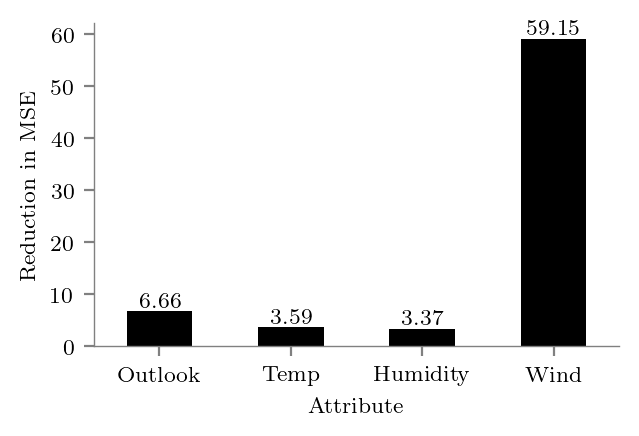

In [46]:
bars = reduction_ser.plot(kind='bar', rot=0, color='k')
format_axes(plt.gca())

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Attribute")
plt.ylabel("Reduction in MSE")
plt.savefig("../figures/decision-trees/discrete-input-real-output-level-1.pdf")

In [26]:
df.groupby("Outlook").groupsa

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupsa'

In [24]:
from latexify import latexify, format_axes
from scipy.special import xlogy

# Function to calculate entropy
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Generate data
x_values = np.linspace(0.000, 1.0, 100)  # Avoid log(0) in the calculation
y_values = entropy(x_values)

/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_19079/845472961.py:6: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
/var/folders/1x/wmgn24mn1bbd2vgbqlk98tbc0000gn/T/ipykernel_19079/845472961.py:6: RuntimeWarning: invalid value encountered in multiply
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


In [25]:
y_values

array([       nan, 0.08146203, 0.14257333, 0.19590927, 0.24414164,
       0.28853851, 0.32984607, 0.36855678, 0.40502013, 0.43949699,
       0.47218938, 0.50325833, 0.53283506, 0.56102849, 0.58793037,
       0.61361902, 0.63816195, 0.66161791, 0.68403844, 0.70546904,
       0.72595015, 0.74551784, 0.76420451, 0.78203929, 0.79904852,
       0.81525608, 0.83068364, 0.84535094, 0.85927598, 0.87247521,
       0.88496364, 0.89675502, 0.90786192, 0.91829583, 0.92806728,
       0.93718586, 0.9456603 , 0.95349858, 0.9607079 , 0.96729478,
       0.97326507, 0.97862399, 0.98337619, 0.98752571, 0.99107606,
       0.99403021, 0.99639062, 0.99815923, 0.9993375 , 0.9999264 ,
       0.9999264 , 0.9993375 , 0.99815923, 0.99639062, 0.99403021,
       0.99107606, 0.98752571, 0.98337619, 0.97862399, 0.97326507,
       0.96729478, 0.9607079 , 0.95349858, 0.9456603 , 0.93718586,
       0.92806728, 0.91829583, 0.90786192, 0.89675502, 0.88496364,
       0.87247521, 0.85927598, 0.84535094, 0.83068364, 0.81525

In [26]:
# Replace NaN values with 0
y_values = np.nan_to_num(y_values, nan=0.0)

In [27]:
latexify(columns=1)

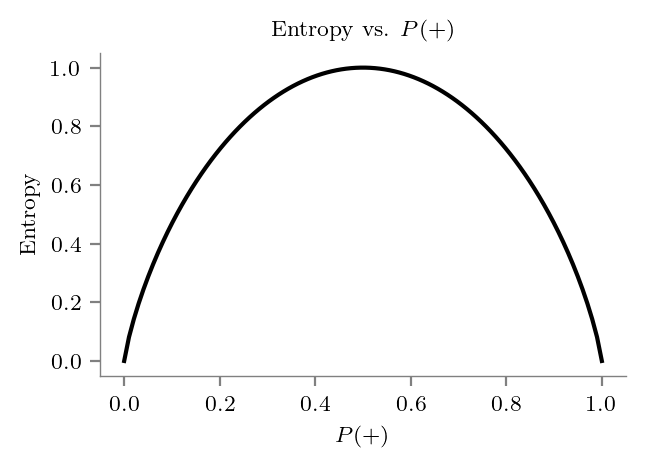

In [28]:
plt.plot(x_values, y_values, color='black')

# Set labels and title
plt.xlabel('$P(+)$')
plt.ylabel('Entropy')
plt.title('Entropy vs. $P(+)$')
format_axes(plt.gca())
plt.savefig("../figures/decision-trees/entropy.pdf")

In [29]:
# Function to calculate entropy with numerical stability
def entropy_numerically_stable(p):
    return (-xlogy(p, p) - xlogy(1 - p, 1 - p))/np.log(2)

y_values = entropy_numerically_stable(x_values)

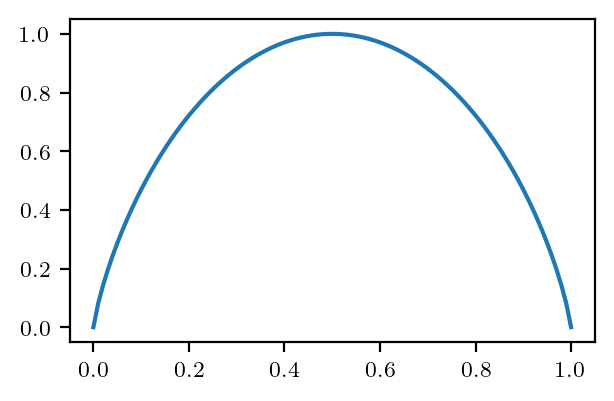

In [30]:
plt.plot(x_values, y_values)

How does `xlogy` handle the corner case?

In [31]:
xlogy??

Call signature:  xlogy(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'xlogy'>
File:            ~/miniconda3/lib/python3.9/site-packages/numpy/__init__.py
Docstring:      
xlogy(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

xlogy(x, y, out=None)

Compute ``x*log(y)`` so that the result is 0 if ``x = 0``.

Parameters
----------
x : array_like
    Multiplier
y : array_like
    Argument
out : ndarray, optional
    Optional output array for the function results

Returns
-------
z : scalar or ndarray
    Computed x*log(y)

Notes
-----
The log function used in the computation is the natural log.

.. versionadded:: 0.13.0

Examples
--------
We can use this function to calculate the binary logistic loss also
known as the binary cross entropy. This loss function is used for
binary classification problems and is defined as:

.. math::
    L = 1/n * \sum_{i=0}^n -(y_i*log(y\_pred_i) + (1-y_i)*log(1-y\_pred_i))

W